In [319]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [320]:
from os.path import dirname, join as pjoin
import scipy.io as io
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import statistics

In [321]:
dios = pd.read_csv (r'/home/emonroe/Downloads/myData2.csv')
dios['day']= dios['date'].ne(dios['date'].shift()).cumsum()
dios['diff_cont'] = dios['contingency'].ne(dios['contingency'].shift())
dios['cont_num'] = dios.groupby(['day','session'])['diff_cont'].cumsum()
dios['stem_switch'] = dios['stem'].ne(dios['stem'].shift())
#dios["stem_switch"] = (dios["stem"].shift(1, fill_value=dios["stem"].head(1)) != dios["stem"]).astype(int) #better way to calc?

del dios['diff_cont']

In [322]:
dios['contingency']

0      502050808020
1      502050808020
2      502050808020
3      502050808020
4      502050808020
           ...     
195    805020202050
196    805020202050
197    805020202050
198    805020202050
199    805020202050
Name: contingency, Length: 200, dtype: int64

In [323]:
# for every trial, how long between in and out? Does he stay longer when he gets reward? 

dios['time_at_well'] = dios['pokeOUTtime'] - dios['pokeINtime']

Text(0, 0.5, 'length of trial (pokeOUT-pokeIN(s)')

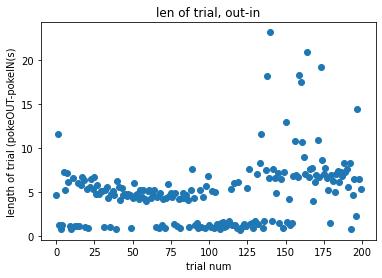

In [324]:
plt.scatter(dios.index, dios['time_at_well'])
plt.title('len of trial, out-in')
plt.xlabel('trial num')
plt.ylabel('length of trial (pokeOUT-pokeIN(s)')
#hommm obviously two diff subgroups! Maybe one is nr and one is rew

Text(0, 0.5, 'num_trials')

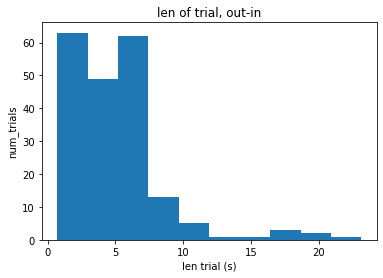

In [325]:
plt.hist(dios['time_at_well'])
plt.title('len of trial, out-in')
plt.xlabel('len trial (s)')
plt.ylabel('num_trials')

Text(0, 0.5, 'length of trial (pokeOUT-pokeIN(s)')

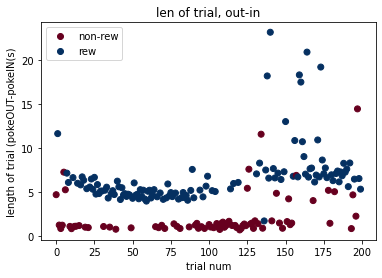

In [326]:
scatter = plt.scatter(dios.index, dios['time_at_well'],c=dios['reward'], cmap=plt.cm.RdBu)
handles, labels = scatter.legend_elements()
labels = ['non-rew','rew']
plt.legend(handles, labels)
plt.title('len of trial, out-in')
plt.xlabel('trial num')
plt.ylabel('length of trial (pokeOUT-pokeIN(s)')

In [327]:
#now lets find the time in between trials 
time_bet_trials=[]
time_bet_trials=[np.nan]
for ix in range(len(dios)-1):
    time_bet_trials.append(dios.loc[ix+1,'pokeINtime']- dios.loc[ix,'pokeOUTtime'])
dios['time_bet_trials'] = time_bet_trials

In [328]:
# dios['stem_switch'] = dios['stem'].ne(dios['stem'].shift())
# dios

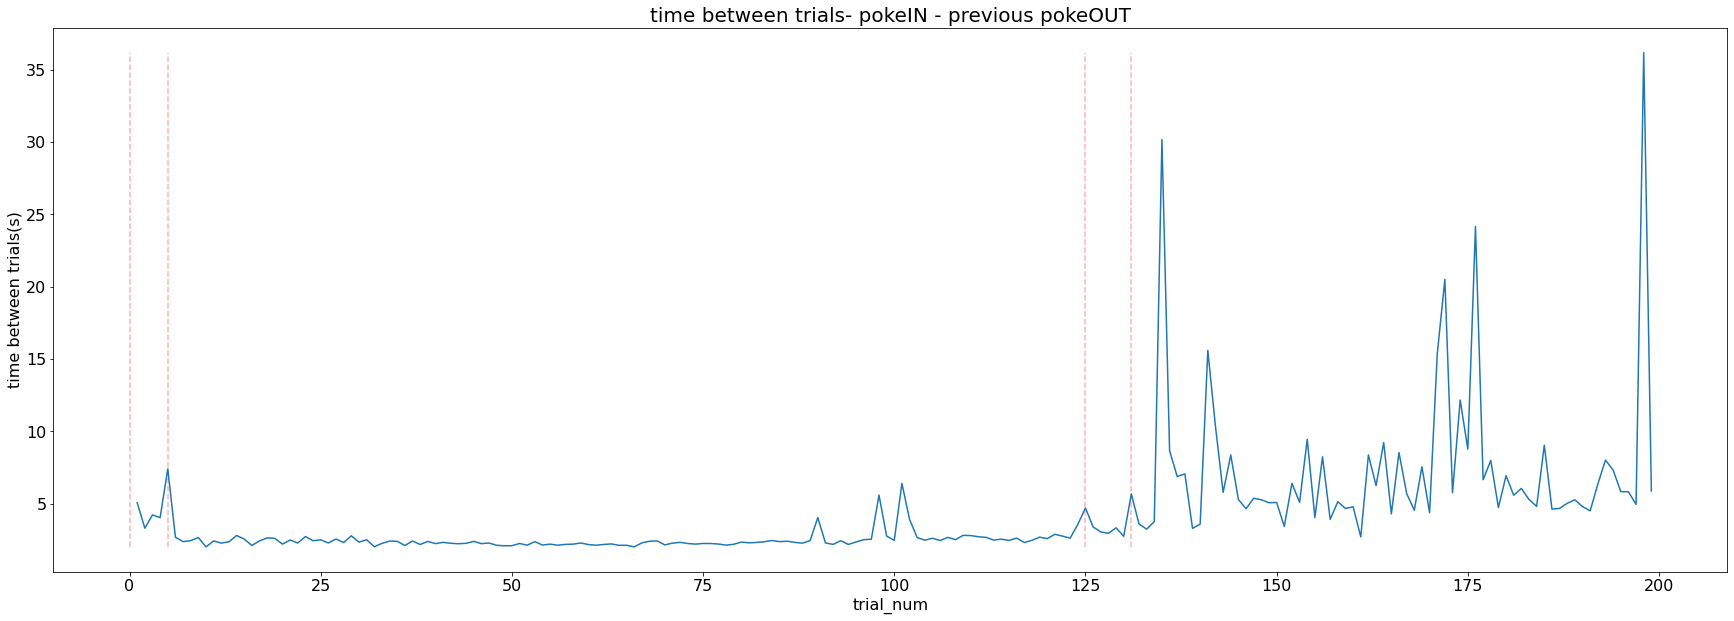

In [329]:
plt.figure(figsize=(30,10))
plt.plot(time_bet_trials)
plt.title('time between trials- pokeIN - previous pokeOUT',fontsize=20)
plt.xlabel('trial_num',fontsize=16)
plt.ylabel('time between trials(s)',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.vlines(dios[dios['stem_switch']].index,dios['time_bet_trials'].min(),(dios['time_bet_trials'].max()),colors='red', ls='--',alpha=0.3)
#want to add lines for bout switches 

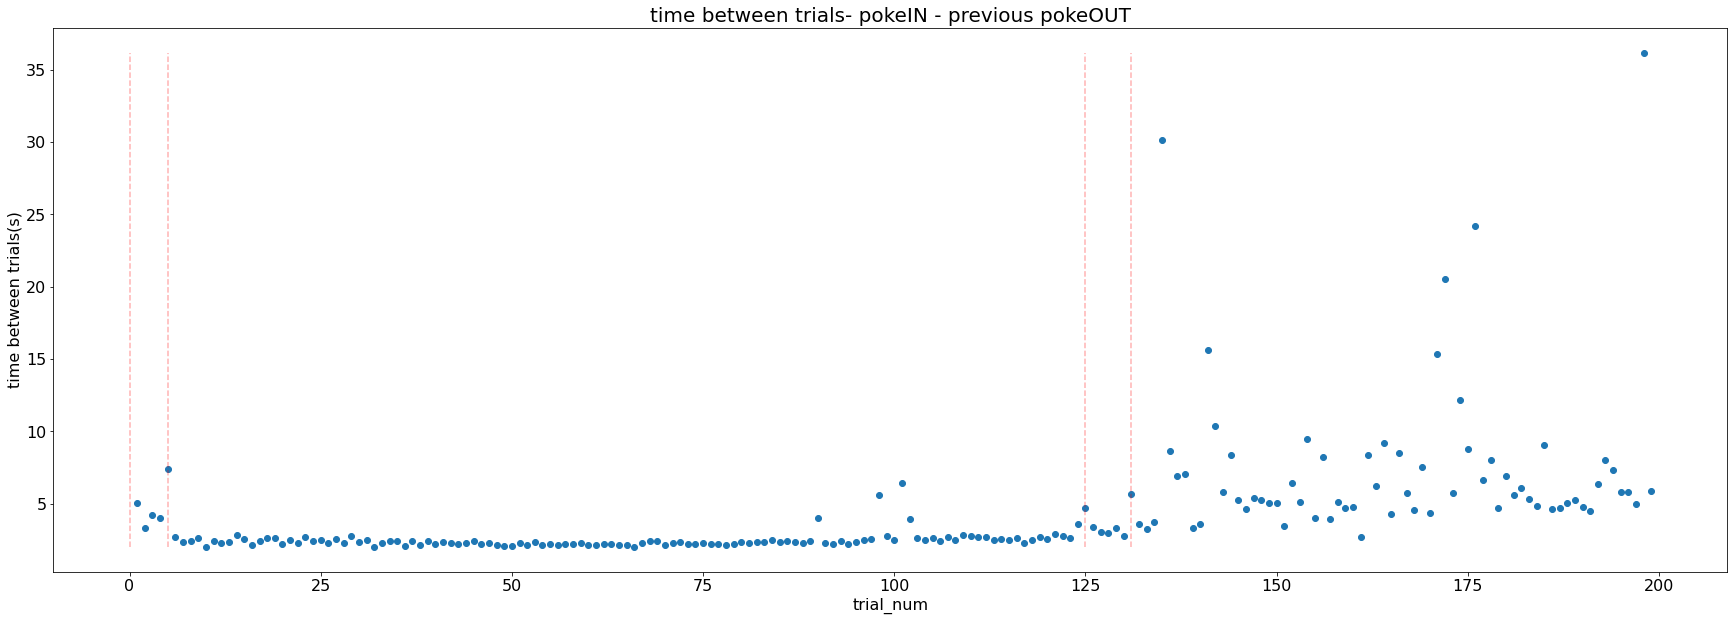

In [330]:
plt.figure(figsize=(30,10))
plt.scatter(range(len(time_bet_trials)),time_bet_trials)
plt.title('time between trials- pokeIN - previous pokeOUT',fontsize=20)
plt.xlabel('trial_num',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('time between trials(s)',fontsize=16)
plt.vlines(dios[dios['stem_switch']].index,dios['time_bet_trials'].min(),(dios['time_bet_trials'].max()),colors='red', ls='--',alpha=0.3)

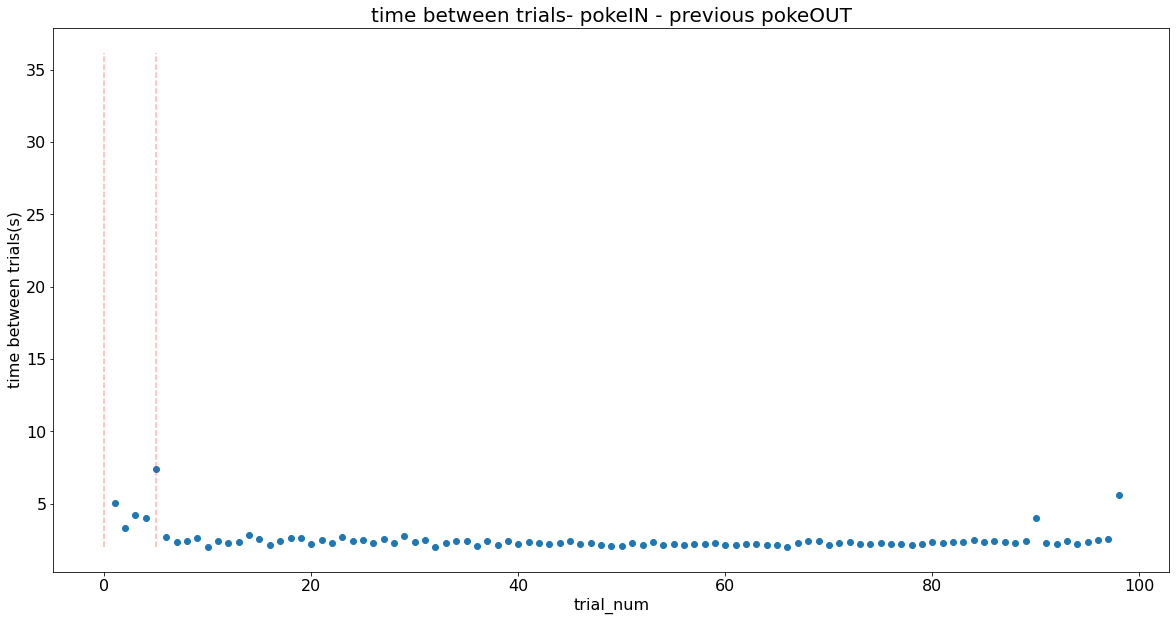

In [331]:
plt.figure(figsize=(20,10))
plt.scatter(range(len(time_bet_trials[0:99])),time_bet_trials[0:99])
plt.title('time between trials- pokeIN - previous pokeOUT',fontsize=20)
plt.xlabel('trial_num',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('time between trials(s)',fontsize=16)
# plt.vlines(dios[dios['stem_switch']].index,(min(time_bet_trials)),(max(time_bet_trials)),colors='red', ls='--',alpha=0.3)
plt.vlines((dios[dios['stem_switch']].index)[(dios[dios['stem_switch']].index)<100],dios['time_bet_trials'].min(),(dios['time_bet_trials'].max()),colors='red', ls='--',alpha=0.3)

Text(0, 0.5, 'time between trials(s)')

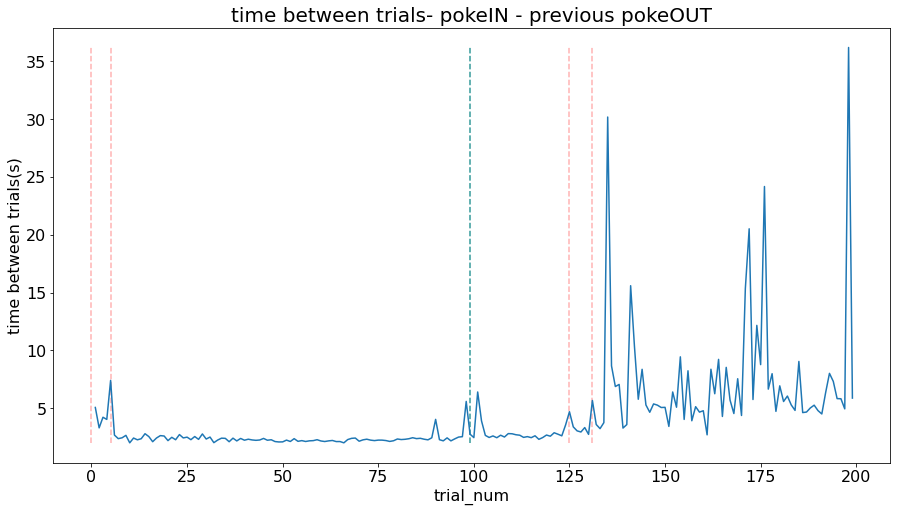

In [332]:
plt.figure(figsize=(15,8))
dios['time_bet_trials'] = time_bet_trials
#time_bet_trials
plt.plot(dios['time_bet_trials'])
plt.vlines(dios[dios['stem_switch']].index,(dios['time_bet_trials']).min(),(dios['time_bet_trials']).max(),colors='red', ls='--',alpha=0.3)
plt.vlines(99,(dios['time_bet_trials']).min(),(dios['time_bet_trials']).max(),colors='teal', ls='--',alpha=0.8)
plt.title('time between trials- pokeIN - previous pokeOUT',fontsize=20)
plt.xlabel('trial_num',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('time between trials(s)',fontsize=16)

In [333]:
#(hmmm interesting quesiton raised by jen - overall time of exp? if he gets same num of rews in 
#exploration versus exploitation, does he take longer at exploitation? )
#id predict no, he takes shorter, he learns to finish more quickly 

In [334]:
#Question sugested by alison- does he slow down in the trials right before a stem switch? 

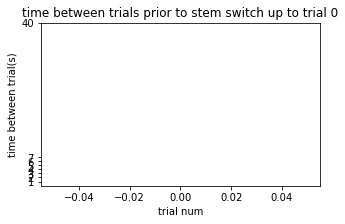

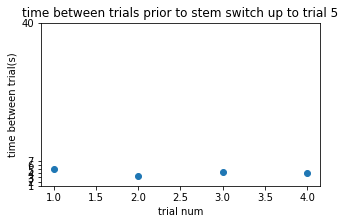

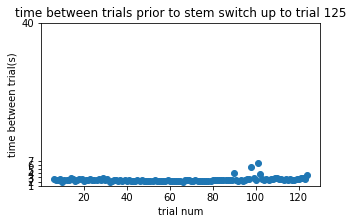

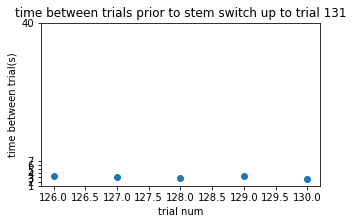

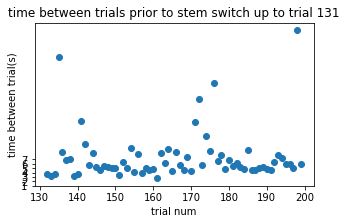

In [335]:
#Should use stem switch times to seperate DIOs. Then within one bout, find time between trials. maybe subplot these. 
#ahhh getting too confusing, need lunch 
for ix in range(0,len(dios[dios['stem_switch']].index)): #range(1,3)
    if (dios[dios['stem_switch']].index[ix]) < (dios[dios['stem_switch']].index.max()): #for ix =1, if 5 < 16 
        index= dios[dios['stem_switch']].index[ix] #index is 5
        last_index = dios[dios['stem_switch']].index[ix-1] #one before is 0
        bout_data = np.where((dios.index<index) & (dios.index>last_index)) #take indexes between 0 and 5 
        bout_data = dios.loc[bout_data] #use those indexes to take df data between indices
        plt.figure(figsize=(5,3))
        plt.scatter(bout_data.index,bout_data['time_bet_trials'])
        plt.title(f'time between trials prior to stem switch up to trial {index}')
        plt.yticks([1,2,3,4,5,6,7,40])
        plt.xlabel('trial num')
        plt.ylabel('time between trial(s)')
    elif (dios[dios['stem_switch']].index[ix]) == (dios[dios['stem_switch']].index.max()):
        index= dios[dios['stem_switch']].index[ix] #index is 5
        last_index = dios[dios['stem_switch']].index[ix-1] #one before is 0
        bout_data = np.where((dios.index<index) & (dios.index>last_index)) #take indexes between 0 and 5 
        bout_data = dios.loc[bout_data] #use those indexes to take df data between indices 
        bout_data1= np.where((dios.index>index)) 
        bout_data1 = dios.loc[bout_data1]
        bout_data1
        plt.figure(figsize=(5,3))
        plt.scatter(bout_data.index,bout_data['time_bet_trials'])
        plt.title(f'time between trials prior to stem switch up to trial {index}')
        plt.yticks([1,2,3,4,5,6,7,40])
        plt.xlabel('trial num')
        plt.ylabel('time between trial(s)')
        plt.figure(figsize=(5,3))
        plt.scatter(bout_data1.index,bout_data1['time_bet_trials'])
        plt.title(f'time between trials prior to stem switch up to trial {index}')
        plt.yticks([1,2,3,4,5,6,7])
        plt.xlabel('trial num')
        plt.ylabel('time between trial(s)')
    #plt.axis.XAxis(0,7)

#     if ix == max(dios[dios['stem_switch']].index):
#         bout_data= np.where((dios.index>index)) 
#         bout_data = dios.loc[bout_data]
#         bout_data
#     plt.figure(figsize=(5,3))
#     plt.scatter(bout_data.index, bout_data['time_bet_trials'])
#     plt.title(f'time between trials prior to stem switch {last_index} - {index}' )
#     plt.xlabel('trial num')
#     plt.ylabel('time between trial(s)')
    

In [336]:
for ix in range(0,len(dios[dios['stem_switch']].index)): #range(1,3)
    if (dios[dios['stem_switch']].index[ix]) < (dios[dios['stem_switch']].index.max()): #for ix =1, if 5 < 16 
        index= dios[dios['stem_switch']].index[ix] #index is 5
        last_index = dios[dios['stem_switch']].index[ix-1] #one before is 0
        bout_data = np.where((dios.index<index) & (dios.index>last_index)) #take indexes between 0 and 5 
        bout_data = dios.loc[bout_data] #use those indexes to take df data between indices
    elif (dios[dios['stem_switch']].index[ix]) == (dios[dios['stem_switch']].index.max()):
        index= dios[dios['stem_switch']].index[ix] #index is 5
        last_index = dios[dios['stem_switch']].index[ix-1] #one before is 0
        bout_data = np.where((dios.index<index) & (dios.index>last_index)) #take indexes between 0 and 5 
        bout_data = dios.loc[bout_data] #use those indexes to take df data between indices 
#         bout_data1= np.where((dios.index>index)) 
#         bout_data1 = dios.loc[bout_data1]
#         bout_data1

5.065999999998894 3.851666666666764
2.456896551724232 2.9776666666669676
3.2164999999995416 3.0046666666664046


Text(0, 0.5, 'avg time bet trials last 3 -\n avg time bet trials for rest of bout')

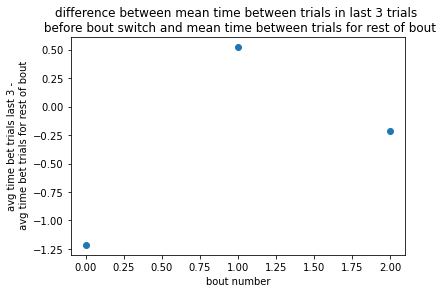

In [337]:
diff_last3_vs_rest=[]
for ix in range(1,len(dios[dios['stem_switch']].index)): #range(1,3)
    if (dios[dios['stem_switch']].index[ix]) <= (dios[dios['stem_switch']].index.max()):
        index= dios[dios['stem_switch']].index[ix] #index is 5
        last_index = dios[dios['stem_switch']].index[ix-1] #one before is 0
        bout_data = np.where((dios.index<index) & (dios.index>last_index))
        bout_data = dios.loc[bout_data] #use those indexes to take df data between indices
        first_part_bout=bout_data.iloc[:-3]['time_bet_trials']
        last3 = bout_data.iloc[-3:]['time_bet_trials']
        print(statistics.mean(first_part_bout),statistics.mean(last3))
        diff_last3_vs_rest.append( statistics.mean(last3)-statistics.mean(first_part_bout)) #if we thought he was spending more time between trials in last 3 bouts, this difference would be postitive (mean of last 3 is higher than mean of rest)
plt.scatter(range(len(diff_last3_vs_rest)),diff_last3_vs_rest)    
plt.title('difference between mean time between trials in last 3 trials \n before bout switch and mean time between trials for rest of bout')  
plt.xlabel('bout number')
plt.ylabel('avg time bet trials last 3 -\n avg time bet trials for rest of bout')

# My original question- does he go faster when he expects reward? 

In [338]:
#finds the best stem and best leaf and adds col to dios. actually changed it, to add a col for better leaf (not just the best leaf always, but better elaf base don where he is currently)
for ix in range(len(dios)):
    cont= str(dios.loc[ix, 'contingency'])
    cont = [cont[i:i+2] for i in range(0, len(cont), 2)]
    cont = [int(i) for i in cont]
    avg_A= statistics.mean(cont[0:2])
    avg_B = statistics.mean(cont[2:4])
    avg_C= statistics.mean(cont[4:6])
    if (avg_A > avg_B) & (avg_A> avg_C):
        best_stem = 'A'
    elif (avg_B > avg_A) & (avg_B> avg_C):
        best_stem = 'B'
    elif (avg_C > avg_B) & (avg_C>avg_A):
        best_stem = 'C'    
    dios.loc[ix, 'best_stem'] = best_stem


for ix in range(len(dios)):
    cont= str(dios.loc[ix, 'contingency'])
    cont = [cont[i:i+2] for i in range(0, len(cont), 2)]
    cont = [int(i) for i in cont]
    if dios.loc[ix, 'stem'] == 'A':
        leaves = cont[0:2]
        if leaves[0]>leaves[1]:
            dios.loc[ix,'better_leaf'] = 1
        else:
            dios.loc[ix,'better_leaf'] = 2
    elif dios.loc[ix, 'stem'] == 'B':
        leaves = cont[2:4]
        if leaves[0]>leaves[1]:
            dios.loc[ix,'better_leaf'] = 3
        else:
            dios.loc[ix,'better_leaf'] = 4
    elif dios.loc[ix, 'stem'] == 'C':
        leaves = cont[2:4]
        if leaves[0]>leaves[1]:
            dios.loc[ix,'better_leaf'] = 5
        else:
            dios.loc[ix,'better_leaf'] = 6

    
dios

,trialnum,leaf,pokeINtime,rewardONtime,rewardOFFtime,pokeOUTtime,stem,reward,date,session,...,EWMexpRewRollBR,EWMexpRewRollCL,EWMexpRewRollCR,day,cont_num,stem_switch,time_at_well,time_bet_trials,best_stem,better_leaf
0,400,2,10621.4191,NaN,NaN,10626.1151,A,0,20200216,3,...,0.95150,0.606588,0.503238,1,1,True,4.696,NaN,B,1.0
1,401,1,10631.1811,10631.2241,10631.5241,10642.8141,A,1,20200216,3,...,0.95150,0.606588,0.503238,1,1,False,11.633,5.066,B,1.0
2,402,2,10646.1161,NaN,NaN,10647.3601,A,0,20200216,3,...,0.95150,0.606588,0.503238,1,1,False,1.244,3.302,B,1.0
3,403,1,10651.5801,NaN,NaN,10652.4291,A,0,20200216,3,...,0.95150,0.606588,0.503238,1,1,False,0.849,4.220,B,1.0
4,404,2,10656.4621,NaN,NaN,10657.6941,A,0,20200216,3,...,0.95150,0.606588,0.503238,1,1,False,1.232,4.033,B,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,595,1,12378.9061,12378.9521,12379.2521,12385.3701,A,1,20200216,3,...,0.36033,0.406367,0.337130,1,2,False,6.464,5.832,A,1.0
196,596,2,12391.1891,NaN,NaN,12393.4441,A,0,20200216,3,...,0.36033,0.406367,0.337130,1,2,False,2.255,5.819,A,1.0
197,597,1,12398.3891,NaN,NaN,12412.8331,A,0,20200216,3,...,0.36033,0.406367,0.337130,1,2,False,14.444,4.945,A,1.0
198,598,2,12449.0171,12449.0611,12449.3861,12455.5451,A,1,20200216,3,...,0.36033,0.406367,0.337130,1,2,False,6.528,36.184,A,1.0


[4.64299999999912, 2.454016666666818, 3.0253333333330374, 6.721823529411856] [3.667500000000473, 2.4863050847458092, 3.1854999999995925, 8.29805882352952]


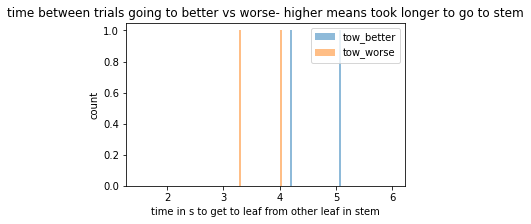

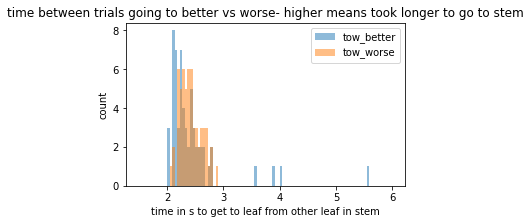

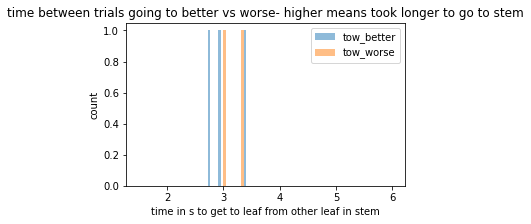

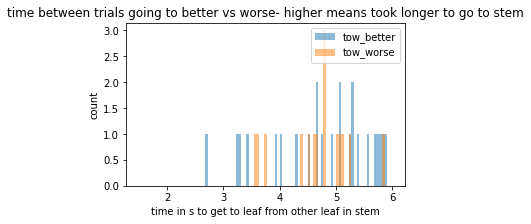

In [339]:
#For every bout at a stem, find mean time taken going towards better leaf and mean time going towards worse leaf. 
#should split up into contignency later to account for rew history change
import random
import numpy
from matplotlib import pyplot

mean_going_tow_better=[]
mean_going_tow_worse =[]
for ix in range(1,len(dios[dios['stem_switch']].index)): #range(1,3)
    if (dios[dios['stem_switch']].index[ix]) < (dios[dios['stem_switch']].index.max()): #for ix =1, if 5 < 16 
        index= dios[dios['stem_switch']].index[ix] #index is 5
        last_index = dios[dios['stem_switch']].index[ix-1] #one before is 0
        bout_data = np.where((dios.index<index) & (dios.index>last_index)) #take indexes between 0 and 5 
        bout_data = dios.loc[bout_data] #use those indexes to take df data between indices
        going_towards_better = bout_data[bout_data['leaf'] == bout_data['better_leaf']]['time_bet_trials']
        mean_going_tow_better.append(statistics.mean(going_towards_better))
        going_towards_worse = bout_data[bout_data['leaf'] != bout_data['better_leaf']]['time_bet_trials']
        mean_going_tow_worse.append(statistics.mean(going_towards_worse))
        x = going_towards_better
        y = going_towards_worse
        bins = numpy.linspace(1.5, 6, 100)
        pyplot.figure(figsize=(5,3))
        pyplot.hist(x, bins, alpha=0.5, label='tow_better')
        pyplot.hist(y, bins, alpha=0.5, label='tow_worse')
        pyplot.legend(loc='upper right')
        pyplot.title("time between trials going to better vs worse- higher means took longer to go to stem")
        pyplot.xlabel('time in s to get to leaf from other leaf in stem')
        pyplot.ylabel('count')
        
    elif (dios[dios['stem_switch']].index[ix]) == (dios[dios['stem_switch']].index.max()):
        index= dios[dios['stem_switch']].index[ix] #index is 5
        last_index = dios[dios['stem_switch']].index[ix-1] #one before is 0
        bout_data = np.where((dios.index<index) & (dios.index>last_index)) #take indexes between 0 and 5 
        bout_data = dios.loc[bout_data] #use those indexes to take df data between indices 
        bout_data1= np.where((dios.index>index)) 
        bout_data1 = dios.loc[bout_data1]
        going_towards_better = bout_data[bout_data['leaf'] == bout_data['better_leaf']]['time_bet_trials']
        mean_going_tow_better.append(statistics.mean(going_towards_better))
        going_towards_worse = bout_data[bout_data['leaf'] != bout_data['better_leaf']]['time_bet_trials']
        mean_going_tow_worse.append(statistics.mean(going_towards_worse))
        x = going_towards_better
        y = going_towards_worse
        bins = numpy.linspace(1.5, 6, 100)
        pyplot.figure(figsize=(5,3))
        pyplot.hist(x, bins, alpha=0.5, label='tow_better')
        pyplot.hist(y, bins, alpha=0.5, label='tow_worse')
        pyplot.legend(loc='upper right')
        pyplot.title("time between trials going to better vs worse- higher means took longer to go to stem")
        pyplot.xlabel('time in s to get to leaf from other leaf in stem')
        pyplot.ylabel('count')
        
        going_towards_better1 = bout_data1[bout_data1['leaf'] == bout_data1['better_leaf']]['time_bet_trials']
        mean_going_tow_better.append(statistics.mean(going_towards_better1))
        going_towards_worse1 = bout_data1[bout_data1['leaf'] != bout_data1['better_leaf']]['time_bet_trials']
        mean_going_tow_worse.append(statistics.mean(going_towards_worse1))
        x1 = going_towards_better1
        y1 = going_towards_worse1
        bins = numpy.linspace(1.5, 6, 100)
        pyplot.figure(figsize=(5,3))
        pyplot.hist(x1, bins, alpha=0.5, label='tow_better')
        pyplot.hist(y1, bins, alpha=0.5, label='tow_worse')
        pyplot.legend(loc='upper right')
        pyplot.title("time between trials going to better vs worse- higher means took longer to go to stem")
        pyplot.xlabel('time in s to get to leaf from other leaf in stem')
        pyplot.ylabel('count')
print(mean_going_tow_better, mean_going_tow_worse)